In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [23]:
df = pd.read_csv(r'C:\Users\sakir\OneDrive\Masaüstü\career\akbank\globalaihub2\fraud_detection2.csv')
df

,category,amt,gender,city,state,city_pop,job,is_fraud,hour,age,is_night_transaction,transaction_speed,distance_to_merchant
0,grocery_net,36.68,M,Birmingham,AL,493806,Musician,0,9,39,0,NaN,80.874467
1,travel,6.94,M,Boulder,MT,1939,Patent attorney,1,22,53,1,11798126.0,52.287253
2,gas_transport,41.96,M,Cleveland,AL,3996,Aid worker,0,0,43,1,-2066814.0,25.509482
3,shopping_net,992.69,M,Powell,TN,25459,"Teacher, special educational needs",1,22,51,1,8805055.0,67.055703
4,health_fitness,21.37,M,Saint James City,FL,3776,Sport and exercise psychologist,1,22,43,1,-25745360.0,78.931562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,grocery_pos,324.00,M,Curlew,IA,223,Estate manager/land agent,1,2,81,1,5445176.0,97.290181
12722,shopping_net,99.01,F,Bailey,NC,6629,Call centre manager,0,2,57,1,-35768945.0,111.905669
12723,home,117.19,F,Joliet,IL,128354,"Teacher, secondary school",0,20,28,0,-368334.0,85.482966
12724,grocery_pos,139.62,M,Paint Rock,AL,653,Paediatric nurse,0,3,54,1,23702066.0,105.106569


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12726 entries, 0 to 12725
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              12726 non-null  object 
 1   amt                   12726 non-null  float64
 2   gender                12726 non-null  object 
 3   city                  12726 non-null  object 
 4   state                 12726 non-null  object 
 5   city_pop              12726 non-null  int64  
 6   job                   12726 non-null  object 
 7   is_fraud              12726 non-null  int64  
 8   hour                  12726 non-null  int64  
 9   age                   12726 non-null  int64  
 10  is_night_transaction  12726 non-null  int64  
 11  transaction_speed     12725 non-null  float64
 12  distance_to_merchant  12726 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.3+ MB


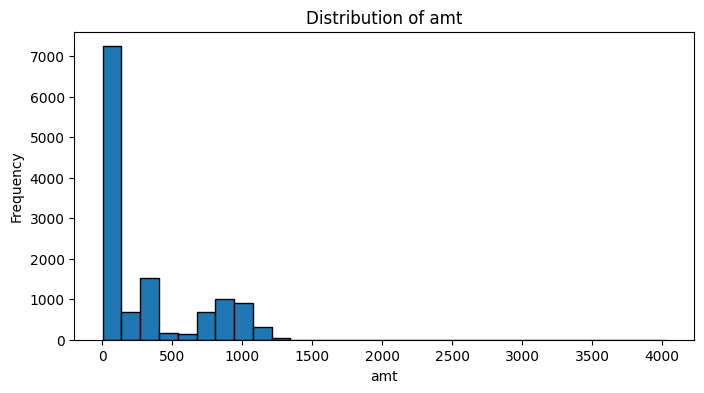

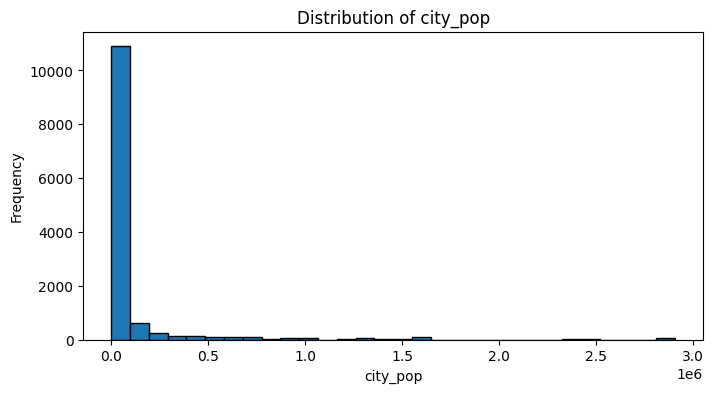

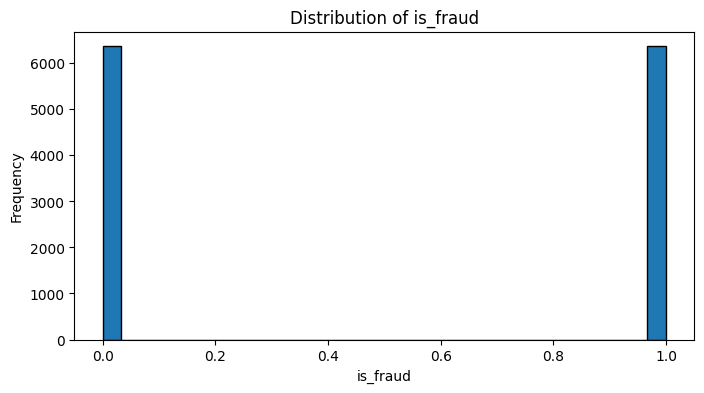

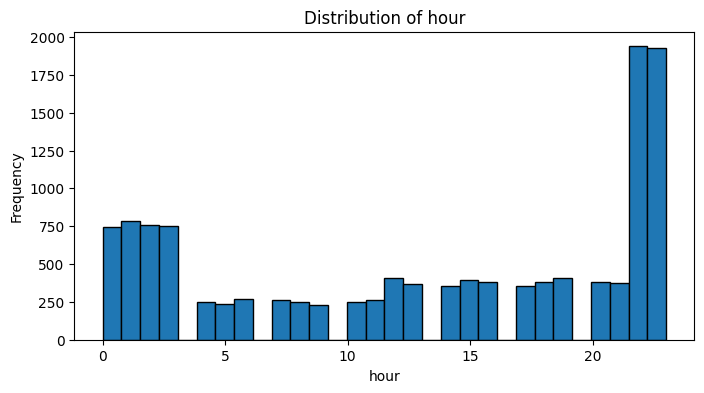

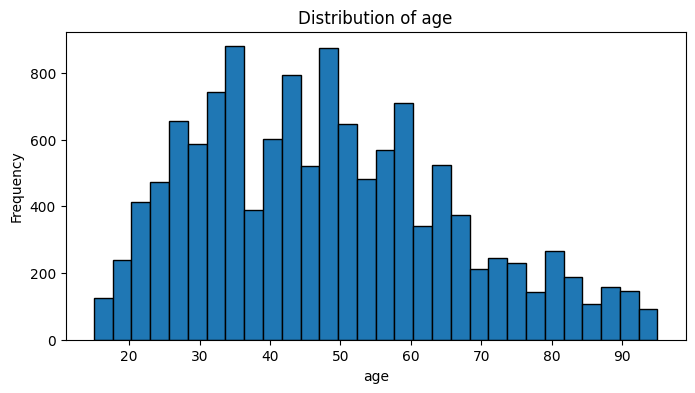

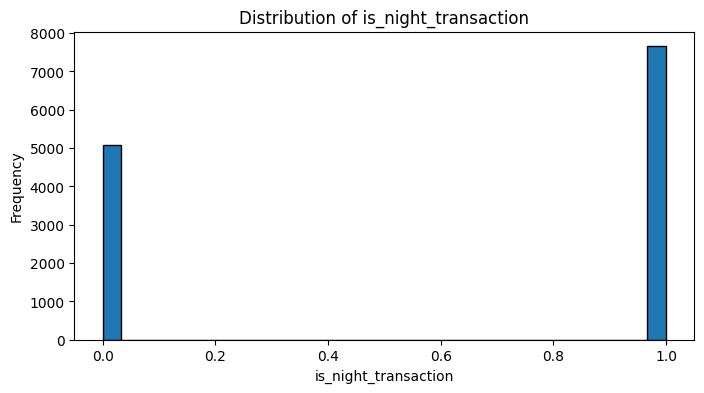

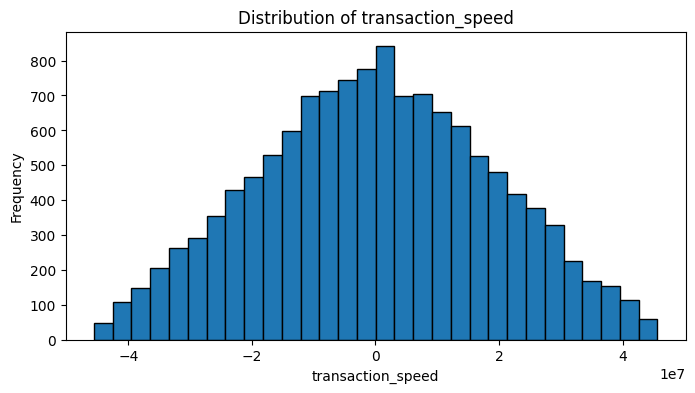

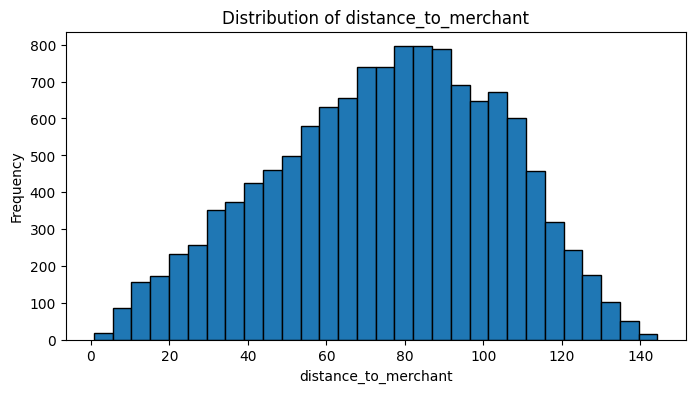

In [25]:
import matplotlib.pyplot as plt

# Plot the distribution for each numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
	plt.figure(figsize=(8, 4))
	df[column].hist(bins=30, edgecolor='k')
	plt.title(f'Distribution of {column}')
	plt.xlabel(column)
	plt.ylabel('Frequency')
	plt.grid(False)
	plt.show()

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,12726.0,299.482374,3.720307e+02,1.010000e+00,2.055250e+01,91.090000,4.741675e+02,4.029600e+03
city_pop,12726.0,93552.680182,3.177178e+05,2.300000e+01,7.770000e+02,2566.000000,1.905400e+04,2.906700e+06
is_fraud,12726.0,0.500000,5.000196e-01,0.000000e+00,0.000000e+00,0.500000,1.000000e+00,1.000000e+00
hour,12726.0,13.318010,8.430005e+00,0.000000e+00,4.000000e+00,15.000000,2.200000e+01,2.300000e+01
age,12726.0,47.878359,1.814406e+01,1.500000e+01,3.300000e+01,46.000000,6.000000e+01,9.500000e+01
is_night_transaction,12726.0,0.601760,4.895546e-01,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00
transaction_speed,12725.0,-429.604008,1.894357e+07,-4.559947e+07,-1.345197e+07,7718.000000,1.352975e+07,4.565758e+07
distance_to_merchant,12726.0,75.165707,2.890885e+01,7.378264e-01,5.471403e+01,77.223007,9.725263e+01,1.443559e+02


In [27]:
# Standartlaştırma Normalizasyon MinMaxScaling LogTransform
# geniş aralıklarda çarpıklık olduğu için kullanılır.
df['amt'] = np.log1p(df['amt'])
df['city_pop'] = np.log1p(df['city_pop'])

# 0-1 aralığına çekmek için
scaler = StandardScaler()
df['hour'] = scaler.fit_transform(df[['hour']])
df['age'] = scaler.fit_transform(df[['age']])
df['transaction_speed'] = scaler.fit_transform(df[['transaction_speed']])
df['distance_to_merchant'] = scaler.fit_transform(df[['distance_to_merchant']])


In [28]:
df['transaction_speed'].fillna(df['transaction_speed'].mean(), inplace=True)

C:\Users\sakir\AppData\Local\Temp\ipykernel_17884\3548056613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction_speed'].fillna(df['transaction_speed'].mean(), inplace=True)


In [29]:
# Label Encoding
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [30]:
df.head()


,category,amt,gender,city,state,city_pop,job,is_fraud,hour,age,is_night_transaction,transaction_speed,distance_to_merchant
0,3,3.629129,1,73,0,13.109900,305,0,-0.512239,-0.489345,0,-4.589213e-18,0.197482
1,13,2.071913,1,83,25,7.570443,327,1,1.029932,0.282287,1,6.228508e-01,-0.791431
2,2,3.760269,1,153,0,8.293299,17,0,-1.579896,-0.268879,1,-1.090853e-01,-1.717750
3,11,6.901425,1,655,41,10.144864,452,1,1.029932,0.172054,1,4.648453e-01,-0.280548
4,5,3.107721,1,715,8,8.236685,429,1,1.029932,-0.268879,1,-1.359086e+00,0.130272


In [31]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

In [32]:
# Veri setini train, validation ve test olarak ayır
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVC': SVC(random_state=42)
}

In [34]:
performance_data = []

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    performance_data.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

performance_table = pd.DataFrame(performance_data)

print("Validation Set Performance:")
print(performance_table)

c:\Users\sakir\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:52:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Set Performance:
                Model  Accuracy  Precision    Recall  F1-Score
0        RandomForest  0.969618   0.975309  0.965377  0.970317
1  LogisticRegression  0.765846   0.771023  0.774949  0.772981
2        DecisionTree  0.962284   0.963340  0.963340  0.963340
3             XGBoost  0.979047   0.975758  0.983707  0.979716
4                 SVC  0.515977   0.524493  0.632383  0.573407


In [35]:
test_performance_data = []

for model_name, model in models.items():
    y_test_pred = model.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    test_performance_data.append({
        "Model": model_name,
        "Accuracy": test_accuracy,
        "Precision": test_precision,
        "Recall": test_recall,
        "F1-Score": test_f1
    })

test_performance_table = pd.DataFrame(test_performance_data)

print("Test Set Performance:")
print(test_performance_table)

Test Set Performance:
                Model  Accuracy  Precision    Recall  F1-Score
0        RandomForest  0.969618   0.973319  0.965079  0.969182
1  LogisticRegression  0.802514   0.802772  0.796825  0.799788
2        DecisionTree  0.957046   0.949948  0.964021  0.956933
3             XGBoost  0.974332   0.974576  0.973545  0.974060
4                 SVC  0.548979   0.535176  0.676190  0.597475


XGBoost, hem validation hem de test setinde en iyi performansı gösteren modeldir.
Model, dolandırıcılık tespiti için en uygun seçimdir.


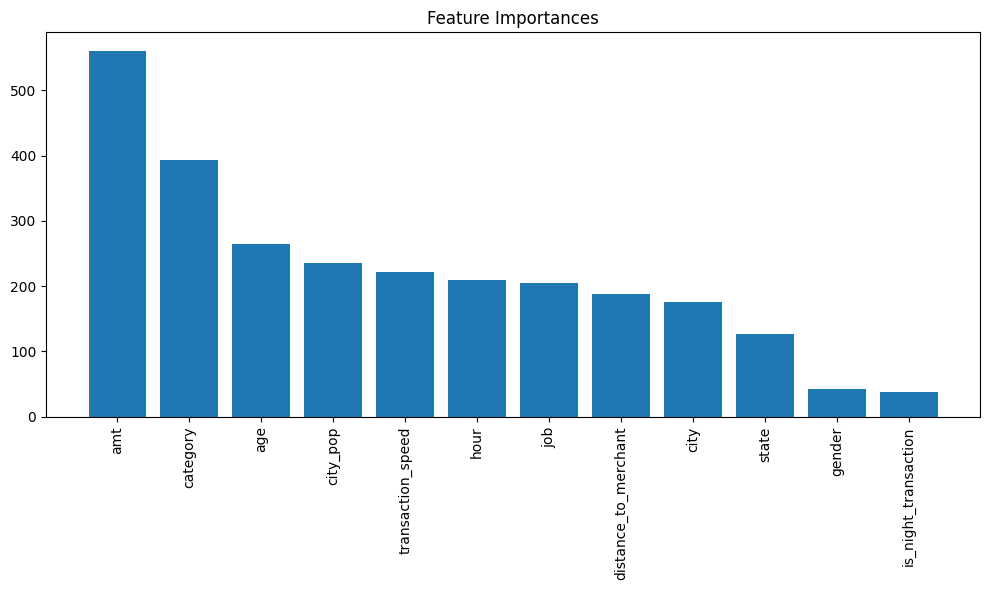

In [36]:
# feature importance
importances = models['XGBoost'].get_booster().get_score(importance_type='weight')
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar([item[0] for item in sorted_importances], [item[1] for item in sorted_importances], align="center")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrix for XGBoost
y_test_pred_xgboost = models['XGBoost'].predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_xgboost, 'XGBoost')


c:\Users\sakir\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
# Hiperparametre optimizasyonu 